In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Load recipes data

data_folder = '../data'
recipes_file = 'cleaned_data.parquet'

cars_data = pd.read_parquet(os.path.join(data_folder, recipes_file))

cars_prices = cars_data['price']
cars_data.drop(columns='price', inplace=True)

X_train, X_test, y_train, y_test = train_test_split(cars_data, cars_prices, test_size=0.15, random_state=1)

scaler = StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed  = scaler.transform(X_test)


lin_mod = LinearRegression().fit(X_train_transformed, y_train)

y_pred = lin_mod.predict(X_test_transformed)

#for negative predictions, set to 1 USD
y_pred[y_pred <= 0] = 1


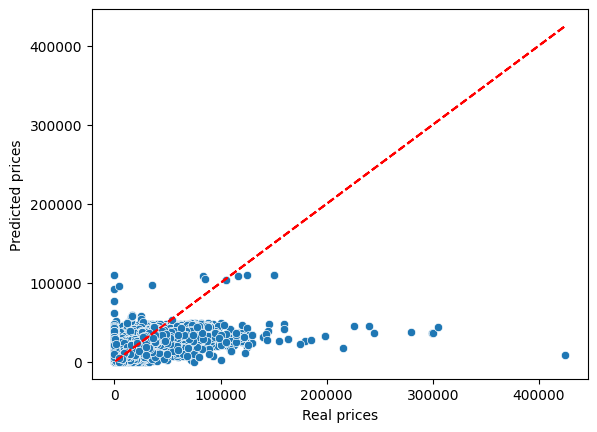

In [8]:
#requires y_test and y_pred as known variables
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = y_test, y = y_pred)
plt.plot(y_test, y_test, 'r--')
plt.xlabel('Real prices')
plt.ylabel('Predicted prices')
plt.show()

In [ ]:
#requires y_test and y_pred as known variables
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(x = y_test, y = y_pred)
plt.plot(y_test, y_test, 'r--')
plt.xlabel('Real prices')
plt.ylabel('Predicted prices')
plt.show()

In [ ]:
#requires y_test and y_pred as known variables
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(x = y_test_transformed.flatten(), y = y_pred_dtr.flatten(), kind = 'hist')
# plt.plot(y_test_transformed.flatten(), y_test_transformed.flatten(), 'r--')
plt.xlabel('Real prices')
plt.ylabel('Predicted prices')
plt.show()